<a href="https://colab.research.google.com/github/KhinSu2Hlaing/Wine_Quality_Prediction/blob/main/Wine_Quality_Real_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
#Import Libraries & Load Dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import recall_score, confusion_matrix, classification_report,accuracy_score
import pickle

## 2. Data Understanding

In [31]:
# load dataset
wine = pd.read_csv("/content/WineQT (1).csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.076,34.0,0.56,9.4,5
1,7.8,0.88,0.00,0.098,67.0,0.68,9.8,5
2,7.8,0.76,0.04,0.092,54.0,0.65,9.8,5
3,11.2,0.28,0.56,0.075,60.0,0.58,9.8,6
4,7.4,0.70,0.00,0.076,34.0,0.56,9.4,5


In [32]:
print(wine.columns)
print(wine.shape)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides',
       'total sulfur dioxide', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
(1143, 8)


In [33]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   chlorides             1143 non-null   float64
 4   total sulfur dioxide  1143 non-null   float64
 5   sulphates             1143 non-null   float64
 6   alcohol               1143 non-null   float64
 7   quality               1143 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 71.6 KB


In [34]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,0.086933,45.914698,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,0.047267,32.782130,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.012000,6.000000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,0.070000,21.000000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,0.079000,37.000000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,0.090000,61.000000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,0.611000,289.000000,2.000000,14.900000,8.000000


## 3. Data Preprocessing

In [35]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
chlorides               0
total sulfur dioxide    0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [36]:
wine_X=wine.iloc[:,:-1]
wine_Y=wine.iloc[:,-1:]

In [37]:
wine_X

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,sulphates,alcohol
0,7.4,0.700,0.00,0.076,34.0,0.56,9.4
1,7.8,0.880,0.00,0.098,67.0,0.68,9.8
2,7.8,0.760,0.04,0.092,54.0,0.65,9.8
3,11.2,0.280,0.56,0.075,60.0,0.58,9.8
4,7.4,0.700,0.00,0.076,34.0,0.56,9.4
...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,0.076,40.0,0.75,11.0
1139,6.8,0.620,0.08,0.068,38.0,0.82,9.5
1140,6.2,0.600,0.08,0.090,44.0,0.58,10.5
1141,5.9,0.550,0.10,0.062,51.0,0.76,11.2


In [38]:
wine_Y

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1138,6
1139,6
1140,5
1141,6


## Data Visualization

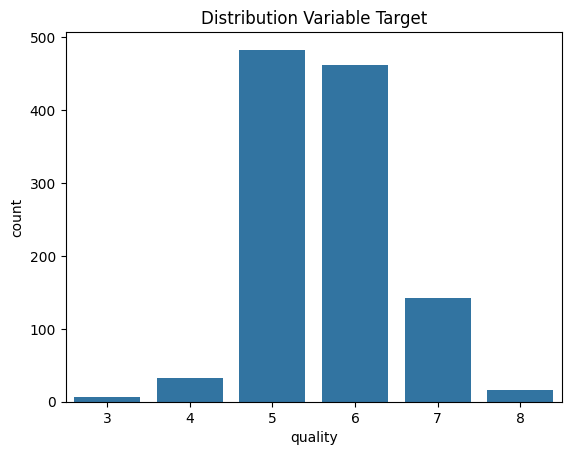

In [39]:
sns.countplot(data=wine, x= 'quality')
plt.title('Distribution Variable Target')
plt.show()

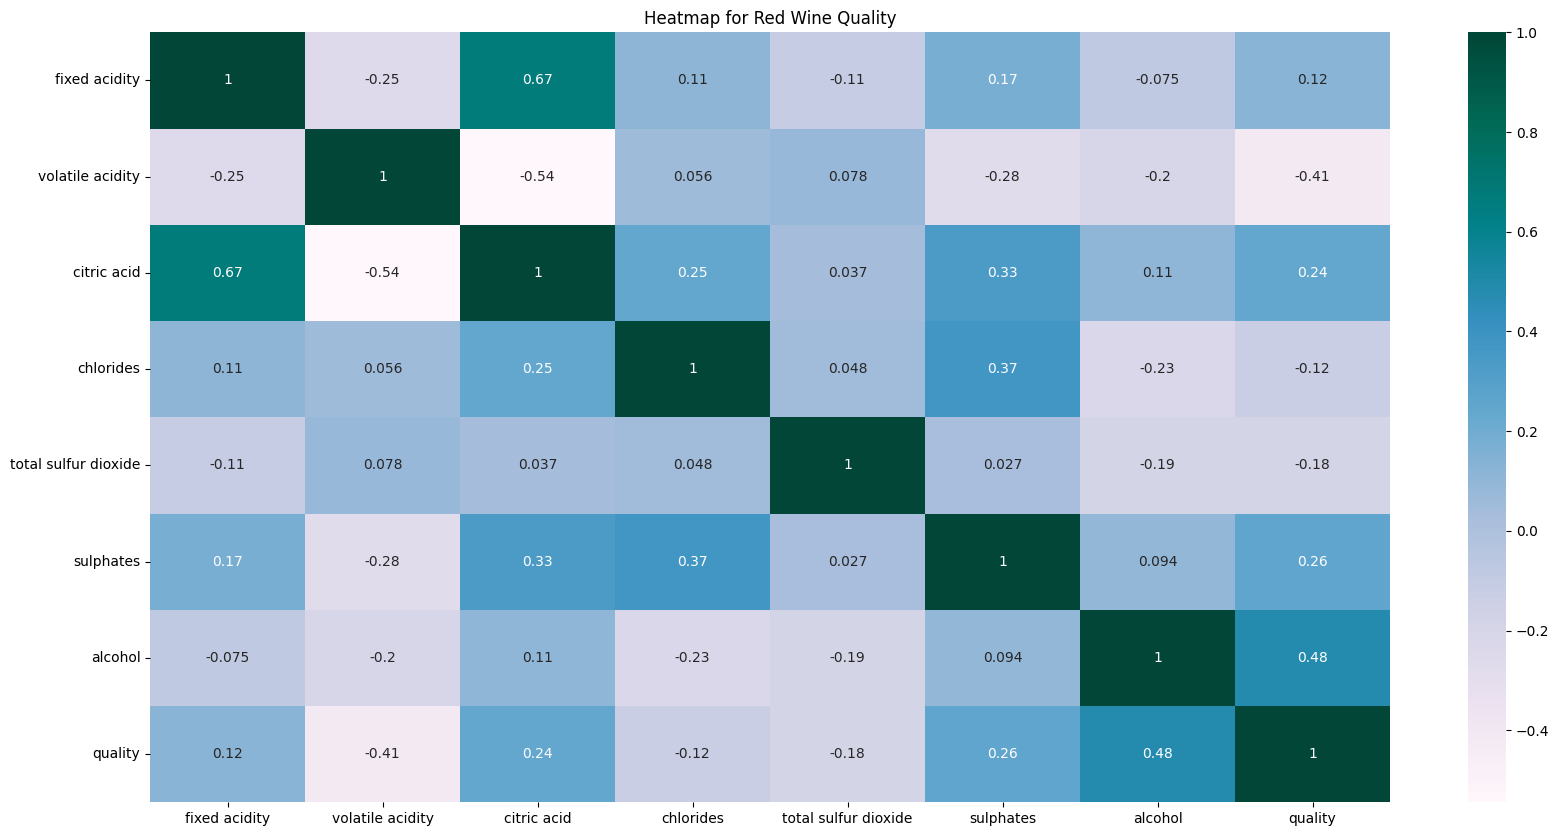

In [40]:
plt.figure(figsize=(20, 10))
sns.heatmap(wine.corr(), annot=True, cmap= 'PuBuGn')
plt.title("Heatmap for Red Wine Quality")
plt.show()

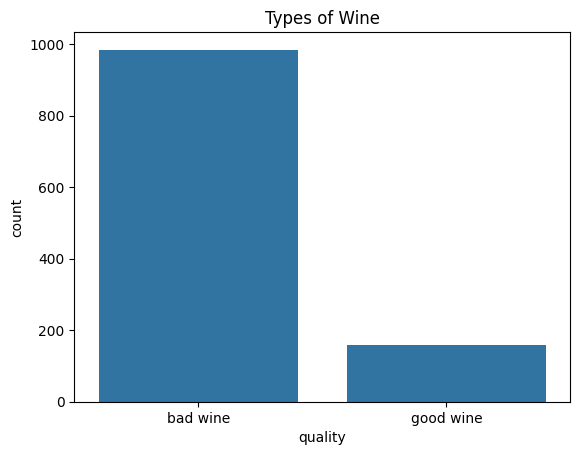

In [41]:
wine['quality'] = wine['quality'].apply(lambda x: 1 if x >= 7 else 0)
sns.countplot(data = wine, x = 'quality')
plt.xticks([0,1], ['bad wine','good wine'])
plt.title("Types of Wine")
plt.show()

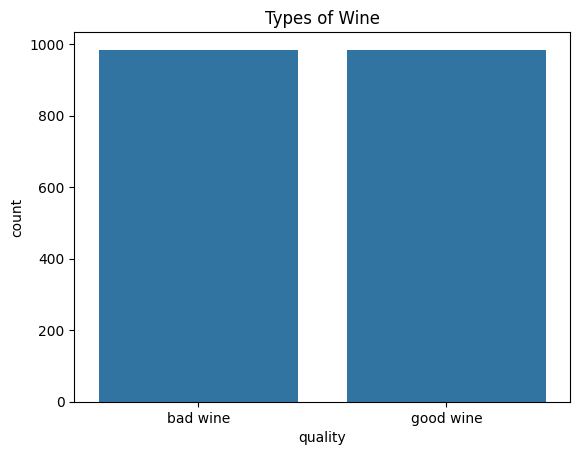

In [42]:
#parameter for requires seed
random_value = 1000

X = wine.drop(['quality'], axis=1)
y = wine.quality

#ran = RandomOverSampler(random_state=random_value)
#X_ros, y_ros = ran.fit_resample(X, y)
oversample = SMOTE()
X_ros, y_ros = oversample.fit_resample(X, y)

sns.countplot(x=y_ros)
plt.xticks([0,1], ['bad wine','good wine'])
plt.title("Types of Wine")
plt.show()


## 4. Modeling

In [43]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(wine_X, wine_Y)

<ipython-input-43-cc65c33f22de>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(wine_X, wine_Y)


RandomForestClassifier()

##  5. Evaluation

In [44]:
# split dataset to train and test variable
# use test size of 20% of the data proportion
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.2, random_state=random_value)
X_train.shape, X_test.shape

((1574, 7), (394, 7))

In [45]:
# scale with StandardScaler
scaler = StandardScaler()

# fit to data training
scaler.fit(X_train)

# transform
x_train = scaler.transform(X_train)
x_test = scaler.transform(X_test)

In [46]:
# Random Forest Regression initialization
rfc = RandomForestClassifier(n_estimators=100, random_state=random_value)

# Cross Validation
rf_score = cross_val_score(estimator = rfc,
                               X = x_train, y= y_train,
                               scoring = 'recall',cv = 10,
                               verbose = 3, n_jobs=-1)

# Fit data training
rfc.fit(x_train, y_train)

# Predict data test
y_pred = rfc.predict(x_test)

print('Avarage Recall score', np.mean(rf_score))
print('Test Recall score', recall_score(y_test, y_pred))
print('Accuracy score',accuracy_score(y_test,y_pred))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.6s finished


Avarage Recall score 0.9584748584748585
Test Recall score 0.9530516431924883
Accuracy score 0.9314720812182741


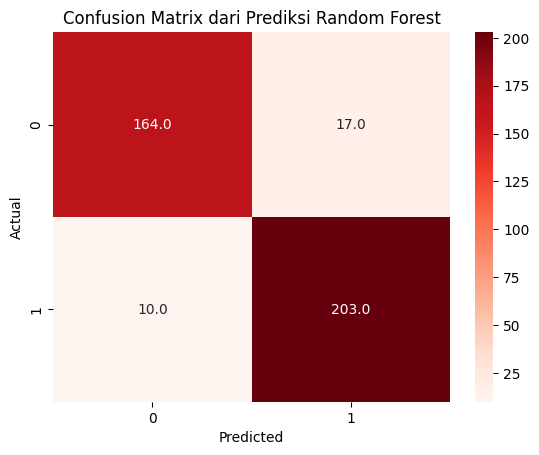

In [47]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Heatmap Confusion Matrix
sns.heatmap(conf_mat, cmap = 'Reds', annot = True, fmt='.1f')
plt.title('Confusion Matrix dari Prediksi Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [50]:
with open('model_pickle', 'wb') as f:
    pickle.dump(rfc, f)